## Lab 1, eil. nr. 7, Ignas Jogminas
## Sprendžiama lygtis: $x - \sin{x} = 0.5$

### 1. Pusiaukirtos metodas

1. Ieškome $(a, b)$, kad $f(a)f(b) < 0$, kai $f(x) = x - \sin{x} - 0.5$ \
Spėjimo būdu: $a = 0, b = \pi \rightarrow f(0)f(\pi) = (-0.5)(\pi - 0.5) < 0$
2. Taikome algoritmą

In [21]:
from math import sin, pi
import pandas as pd

f = lambda x: x - sin(x) - 0.5
a = 0
b = pi
error = abs(b - a)
mid_val = (a + b) / 2
f_mid_val = f(mid_val)
min_error = 1e-10
i = 0
df = pd.DataFrame(columns=["iter.i", "a_i", "b_i", "(a_i+b_i)/2", "f((a_i+b_i)/2)", "|b_i-a_i|"])

In [22]:
def min_error_reached(error, min_error):
  if error < 2*min_error:
    print(f"Minimum error reached: {error} < {min_error}")
    return True
  return False

def reached_root(f, mid_val):
  if f(mid_val) == 0:
    print(f"Root found = {mid_val}")
    return True
  return False

In [23]:
while not min_error_reached(error, min_error) and not reached_root(f, mid_val):
  df.loc[i] = [i, a, b, mid_val, f_mid_val, error]
  mid_val = (a + b) / 2
  f_mid_val = f(mid_val)
  if  f(a) * f_mid_val < 0:
    b = mid_val
  else:
    a = mid_val
  error = abs(b - a)
  i += 1

Minimum error reached: 1.828646123414046e-10 < 1e-10


In [24]:
df

,iter.i,a_i,b_i,(a_i+b_i)/2,f((a_i+b_i)/2),|b_i-a_i|
0,0.0,0.000000,3.141593,1.570796,7.079633e-02,3.141593e+00
1,1.0,0.000000,1.570796,1.570796,7.079633e-02,1.570796e+00
2,2.0,0.785398,1.570796,0.785398,-4.217086e-01,7.853982e-01
3,3.0,1.178097,1.570796,1.178097,-2.457823e-01,3.926991e-01
4,4.0,1.374447,1.570796,1.374447,-1.063385e-01,1.963495e-01
5,5.0,1.472622,1.570796,1.472622,-2.256317e-02,9.817477e-02
6,6.0,1.472622,1.521709,1.521709,2.291349e-02,4.908739e-02
7,7.0,1.497165,1.521709,1.497165,-1.252077e-04,2.454369e-02
8,8.0,1.497165,1.509437,1.509437,1.131898e-02,1.227185e-02
9,9.0,1.497165,1.503301,1.503301,5.578105e-03,6.135923e-03


In [19]:
import matplotlib.pyplot as plt
import numpy as np

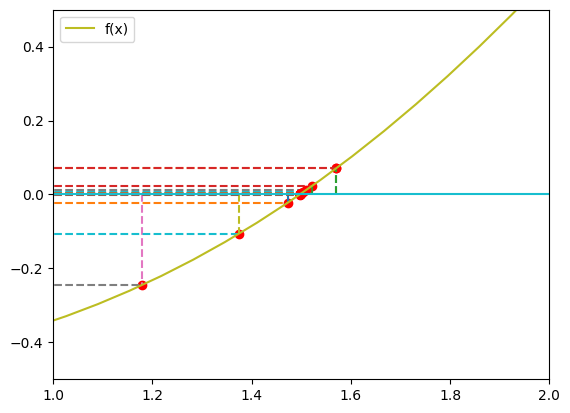

In [25]:
def plot_iterations(df, iter_list, f, a, b):
  x = np.linspace(a, b)
  y = f(x)
  for i in iter_list:
    iter_mid_val = df.loc[i]['(a_i+b_i)/2']
    iter_f_val = df.loc[i]['f((a_i+b_i)/2)']
    plt.plot(iter_mid_val, iter_f_val, 'ro', label='_nolegend_')
    plt.plot([iter_mid_val, iter_mid_val], [0, iter_f_val], '--', label='_nolegend_')
    plt.plot([0, iter_mid_val], [iter_f_val, iter_f_val], '--', label='_nolegend_')
  plt.plot(x, y)
  plt.plot([0, b], [0, 0], '-', label='_nolegend_')
  plt.xlim(1, 2)
  plt.ylim(-0.5, 0.5)
  plt.margins(0)
  plt.legend(["f(x)"])
  plt.show()


plot_iterations(df, df['iter.i'], lambda x: x - np.sin(x) - 0.5, 0, pi)

### 2. Paprastųjų iteracijų metodas

1. Pasirenkame funkciją $g$, kad $g(x) = x$ ir $f(x) = 0$ lygtys turėtų tas pačias šaknis. \
$f(x) = x - \sin{x} - 0.5 = 0 \rightarrow x = \sin{x} + 0.5 = g(x)$

2. Pasirenkame artinį $x_0$ iš teigiamos ir neigiamos $f(x)$ reikšmės intervale $x_0\in[0, \pi]$ aplink šaknį, \
Pavyzdžiui $x_0 = 0$

3. Iteruojame $x_{i+1} = g(x_i)$, iki kol $|g(x_i) - x_i| \leq \frac{1-q}{q}\epsilon$, su pasirinkta paklaida $\epsilon$, kur $q = |g'(x_i)| = |\cos{x_i}| < 1$ \
Ir kadangi $max(|\cos{x_i}|) = 1 < 1$ netiesa, tai procesas konverguos.

In [26]:
from math import sin, cos, pi
import pandas as pd

g = lambda x: sin(x) + 0.5
g_ = lambda x: cos(x)
a = 0
x_i = a
b = pi
min_error = 1e-10
f_error = lambda x: abs(g(x) - x)
error = f_error(x_i)
f_min_error_bound = lambda x: (1 - g_(x)) / g_(x) * min_error
min_error_bound = f_min_error_bound(x_i)
i = 0

def min_error_reached(error, min_error_bound):
  return error <= min_error_bound

df = pd.DataFrame(columns=["iter.i", "x_i", "g(x_i)", "|g(x_i)-x_i|", "(1-q)/q*error"])

In [27]:
while not min_error_reached(error, min_error_bound):
  x_next = g(x_i)
  df.loc[i] = [i, x_i, x_next, error, min_error_bound]
  x_i = x_next
  error = f_error(x_i)
  min_error_bound = f_min_error_bound(x_i)
  i += 1

In [28]:
df

,iter.i,x_i,g(x_i),|g(x_i)-x_i|,(1-q)/q*error
0,0.0,0.000000,0.500000,5.000000e-01,0.000000e+00
1,1.0,0.500000,0.979426,4.794255e-01,1.394939e-11
2,2.0,0.979426,1.330177,3.507517e-01,7.937234e-11
3,3.0,1.330177,1.471191,1.410134e-01,3.196322e-10
4,4.0,1.471191,1.495043,2.385282e-02,9.056207e-10
5,5.0,1.495043,1.497132,2.088670e-03,1.221345e-09
6,6.0,1.497132,1.497288,1.558964e-04,1.258740e-09
7,7.0,1.497288,1.497299,1.146148e-05,1.261616e-09
8,8.0,1.497299,1.497300,8.416898e-07,1.261828e-09
9,9.0,1.497300,1.497300,6.180552e-08,1.261844e-09


In [6]:
import matplotlib.pyplot as plt
import numpy as np

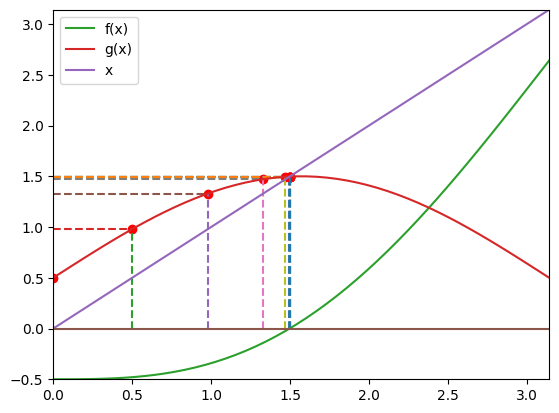

In [29]:
def plot_iterations(df, iter_list, f, a, b):
  x = np.linspace(a, b)
  y = f(x)
  for i in iter_list:
    iter_x_i = df.loc[i]['x_i']
    iter_g_x_i = df.loc[i]['g(x_i)']
    plt.plot(iter_x_i, iter_g_x_i, 'ro', label='_nolegend_')
    plt.plot([iter_x_i, iter_x_i], [0, iter_g_x_i], '--', label='_nolegend_')
    plt.plot([0, iter_x_i], [iter_g_x_i, iter_g_x_i], '--', label='_nolegend_')
  plt.plot(x, y)
  y = np.sin(x) + 0.5
  plt.plot(x, y)
  y = x
  plt.plot(x, y)
  plt.plot([0, b], [0, 0], '-', label='_nolegend_')
  # plt.xlim(1, 2)
  # plt.ylim(-0.5, 0.5)
  plt.legend(["f(x)", "g(x)", "x"])
  plt.margins(0)
  plt.show()


plot_iterations(df, df['iter.i'], lambda x: x - np.sin(x) - 0.5, 0, pi)